Baixar os datasets para a máquina do Colab

In [1]:
# Instalar Git LFS e langdetect
!apt-get install -y git-lfs
!git lfs install
!pip install langdetect

# Criar pasta para os datasets
import os
dataset_folder = '/content/datasets/'
os.makedirs(dataset_folder, exist_ok=True)

# Lista de arquivos que queremos
files_to_download = [
    "20230727_195816_hn_sharings.json",
    "20230727_195927_pr_sharings.json",
    "20230727_195941_issue_sharings.json",
    "20230727_195954_discussion_sharings.json",
    "20230727_200003_commit_sharings.json",
    "20230727_200102_file_sharings.json"
]

# Criar um repositório temporário só para pegar os arquivos do LFS
!rm -rf temp_repo
!git init temp_repo
os.chdir('temp_repo')
!git remote add origin https://github.com/NAIST-SE/DevGPT.git
!git config core.sparseCheckout true

# Especificar os arquivos que queremos no sparse-checkout
with open(".git/info/sparse-checkout", "w") as f:
    for file in files_to_download:
        f.write(f"snapshot_20230727/{file}\n")

# Puxar apenas os arquivos especificados
!git pull origin main

# Mover os arquivos para datasets
import shutil
for file in files_to_download:
    src = os.path.join("snapshot_20230727", file)
    dst = os.path.join(dataset_folder, file)
    shutil.move(src, dst)

os.chdir('/content')
print(f"✅ Arquivos baixados em {dataset_folder}")

# # Opcional: baixar para sua máquina
# from google.colab import files  # para baixar direto para sua máquina
# for filename in urls.keys():
#     print(f"Preparando download de {filename} para sua máquina...")
#     files.download(save_folder + filename)


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git-lfs is already the newest version (3.0.2-1ubuntu0.3).
0 upgraded, 0 newly installed, 0 to remove and 2 not upgraded.
Git LFS initialized.
hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Initialized empty Git repository in /content/temp_repo/.git/
remote: Enumerating objects: 250, done.
remote: Counting objects: 100% (109/109), done.
remote: Compressing objects: 100% (91/91), done.
remote: Total 250 (delta 23), reused 88 (delta 17), pack-reused 141 (from 1)
R

Replicação - Equipe

- snapshot_20230727
- pegaram 100 conversas para montar as categorias
- resultou em 22 categorias
- 95% de confiança e 5% de erro
- Qualquer conversa que não estiver disponível e não for em inglês, descarta (N/A)

Importando o dataset em json

In [32]:
import os
import json
import pandas as pd

# Pasta onde estão os arquivos JSON
dataset_folder = './datasets/'

# Lista todos os arquivos JSON na pasta
json_files = [f for f in os.listdir(dataset_folder) if f.endswith('.json')]

all_sources = []

for file in json_files:
    file_path = os.path.join(dataset_folder, file)
    print(file_path)

    with open(file_path, 'r', encoding='utf-8') as f:
        try:
            data = json.load(f)
        except json.JSONDecodeError:
            print(f"❌ Erro ao ler {file}")
            continue

    # Pega os dados da chave "Sources", se existir
    sources = data.get("Sources", [])

    # Adiciona uma coluna extra para identificar o arquivo de origem
    for source in sources:
        source["dataset_origin"] = file

    all_sources.extend(sources)

# Cria o DataFrame final
df = pd.DataFrame(all_sources)
print("Arquivos importados!")


./datasets/20230727_195927_pr_sharings.json
./datasets/20230727_195941_issue_sharings.json
./datasets/20230727_200003_commit_sharings.json
./datasets/20230727_200102_file_sharings.json
./datasets/20230727_195954_discussion_sharings.json
./datasets/20230727_195816_hn_sharings.json
Arquivos importados!


In [33]:
print(f"✅ Total de registros: {len(df)}")
df.head()

✅ Total de registros: 1478


,Type,URL,Author,RepoName,RepoLanguage,Number,Title,Body,CreatedAt,ClosedAt,...,FilePath,Content,CommitMessage,Closed,UpvoteCount,ID,Points,AttachedURL,StoryText,CommentsTotalCount
0,pull request,https://github.com/labdao/plex/pull/469,AdamGoyer,labdao/plex,Go,469.0,add readme for openbabel to PLEX,The Chatgpt Thread used to create this pull re...,2023-07-05T03:30:54Z,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,pull request,https://github.com/labdao/plex/pull/468,AdamGoyer,labdao/plex,Go,468.0,add readme for Gnina #462,Link to the ChatGPT conversation used to creat...,2023-07-05T02:53:12Z,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,pull request,https://github.com/ActivityWatch/aw-webui/pull...,ErikBjare,ActivityWatch/aw-webui,Vue,455.0,feat: improved categorization helper to includ...,Came up with this while thinking about the bug...,2023-06-22T15:47:50Z,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,pull request,https://github.com/open-learning-exchange/mypl...,Okuro3499,open-learning-exchange/myplanet,Java,2229.0,adding French to strings (fixes #2216),this pull request contains french translations...,2023-07-20T14:16:56Z,2023-07-24T10:20:08Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,pull request,https://github.com/sleepyRias/RASandbox/pull/76,Multi538,sleepyRias/RASandbox,Vue,76.0,72 router,,2023-07-24T15:04:07Z,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


percorre o JSON das fontes e conversas do ChatGPT, filtra apenas os primeiros prompts feitos pelos usuários e transforma em uma linha estruturada com metadados para análise em um DataFrame.


In [34]:
rows = []

# Converte DataFrame em lista de dicionários
records = df.to_dict(orient="records")

# iterar e pegar somente o primeiro prompt de cada conversa
for src in records:
    chat_sharings = src.get("ChatgptSharing", []) or []
    for share in chat_sharings:
        conversations = share.get("Conversations", []) or []

        # Pega apenas o primeiro item, se existir
        if not conversations:
            continue

        first_turn = conversations[0]
        prompt = first_turn.get("Prompt")  # ajuste a chave se necessário

        if prompt is None:
            continue

        rows.append({
            "source_type": src.get("Type"),
            "source_url": src.get("URL"),
            "source_title": src.get("Title"),
            "chat_url": share.get("URL"),
            "chat_title": share.get("Title"),
            "date_of_conversation": share.get("DateOfConversation"),
            "status": share.get("Status"),
            "prompt": prompt
        })

df = pd.DataFrame(rows)

print(df.columns)
print(f"Total de prompts extraídos: {len(df)}")


Index(['source_type', 'source_url', 'source_title', 'chat_url', 'chat_title',
       'date_of_conversation', 'status', 'prompt'],
      dtype='object')
Total de prompts extraídos: 1745


Tratamentos:
*   Limpeza de texto
*   Remover prompts que não estão em inglês
*   Remover duplicatas



In [35]:
import re
from langdetect import detect, LangDetectException

def detect_language(text):
    try:
        return detect(text)
    except LangDetectException:
        return "unknown"

if not df.empty:
    df["prompt"] = (
        df["prompt"]
        .astype(str)
        .str.replace(r"\s+", " ", regex=True)
        .str.strip()
    )
    df = df[df["prompt"].str.len() > 0].reset_index(drop=True)

print(f"Limpeza no texto: {len(df)}")
print(f"\nAntes dos filtros: {len(df)}")

# Classificando as conversas por idioma.
df["lang"] = df["prompt"].apply(detect_language)

# Manter somente conversas em Inglês no Dataset
df_lang = df[df["lang"] == "en"]

print(f"\nApós filtro de idioma (inglês): {len(df_lang)}")

# Realizar uma última verificação para garantir
# que os dados estejam filtrados de maneira adequada.
# Removendo NAN e prompt com menos de 5 caracteres
df = df_lang[
    df_lang["prompt"].notna() & (df_lang["prompt"].str.len() > 5)
].reset_index(drop=True)

# Remover duplicatas antes da amostragem
df = df.drop_duplicates(subset=["prompt"]).reset_index(drop=True)

print(f"\nApós remoção de duplicatas: {len(df)}")

print(f"\nDataset final após todos os filtros: {len(df)}")

Limpeza no texto: 1744

Antes dos filtros: 1744

Após filtro de idioma (inglês): 1557

Após remoção de duplicatas: 1281

Dataset final após todos os filtros: 1281


Selecionar aleatoriamente 100 conversas para a fase exploratória.

In [36]:
# Selecionar aleatoriamente 100 conversas para fase exploratória
trial_sample = df.sample(n=100, random_state=42)

# Gerar .csv
# trial_sample.to_csv("trial_phase.csv", index=False)

Amostra estatística de 321 conversas

In [19]:
# Retirar do dataset principal os 100 selecionados
remaining = df.drop(trial_sample.index)
# Do dataset restante, selecionar 321 para analise manual
coding_sample = remaining.sample(n=321, random_state=42)

# Gerar .csv
# coding_sample.to_csv("coding_phase.csv", index=False)


## Fase manual
Aqui será gerado o csv com 321 prompts para a classificação manual de categorias por dois avaliadores.

In [20]:
# Criar as colunas para o preenchimento das categorias pelos 2 anotadores
coding_sample["annotator_A"] = ""
coding_sample["annotator_B"] = ""

# Gerar o .csv
coding_sample[[
    "chat_url",
    "prompt",
    "annotator_A",
    "annotator_B"
]].to_csv("annotation_sheet.csv", index=False)


## Cohen's Kappa

Aqui será feito o upload do csv preenchido pelas categorias definidas pelos anotadores e será calculada a concordância utilizando o Cohen's Kappa

é uma métrica estatística robusta que mede a concordância entre dois avaliadores (ou classificadores) que classificam itens em categorias nominais, corrigindo a concordância que ocorre por acaso

In [21]:
from sklearn.metrics import cohen_kappa_score

annotated = pd.read_csv("annotation_sheet_filled.csv")

kappa = cohen_kappa_score(
    annotated["annotator_A"],
    annotated["annotator_B"]
)

print("Cohen's Kappa:", kappa)


Cohen's Kappa: 0.34125230869517986


## Consolidação dos rótulos

In [23]:
def resolve_label(row):
    if row["annotator_A"] == row["annotator_B"]:
        return row["annotator_A"]
    return row["annotator_B"]

annotated["label"] = annotated.apply(resolve_label, axis=1)
final_dataset = annotated[["prompt", "label"]]


## Pré-processamento textual

In [24]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re

nltk.download("stopwords")

stemmer = PorterStemmer()
stop_words = set(stopwords.words("english"))

def preprocess(text):
    text = text.lower()
    text = re.sub(r"[^a-z\s]", "", text)
    tokens = text.split()
    tokens = [stemmer.stem(t) for t in tokens if t not in stop_words]
    return " ".join(tokens)

final_dataset["clean_text"] = final_dataset["prompt"].apply(preprocess)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
/tmp/ipython-input-2080395111.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_dataset["clean_text"] = final_dataset["prompt"].apply(preprocess)


## Classificação automática

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(final_dataset["clean_text"])
y = final_dataset["label"]


## Treinamento dos modelos

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

models = {
    "SVM": LinearSVC(),
    "Naive Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}


In [30]:
from sklearn.metrics import classification_report, confusion_matrix

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    print(f"\nModelo: {name}")
    print(classification_report(y_test, preds, zero_division=0))



Modelo: SVM
                       precision    recall  f1-score   support

            Debugging       0.00      0.00      0.00         3
Design Recommendation       0.00      0.00      0.00         1
         General Info       0.00      0.00      0.00         1
               How-to       0.00      0.00      0.00         4
          Simple Task       0.53      1.00      0.69        26
           Write Code       1.00      0.53      0.70        30

             accuracy                           0.65        65
            macro avg       0.26      0.26      0.23        65
         weighted avg       0.67      0.65      0.60        65


Modelo: Naive Bayes
                       precision    recall  f1-score   support

            Debugging       0.00      0.00      0.00         3
Design Recommendation       0.00      0.00      0.00         1
         General Info       0.00      0.00      0.00         1
               How-to       0.00      0.00      0.00         4
          Simple 

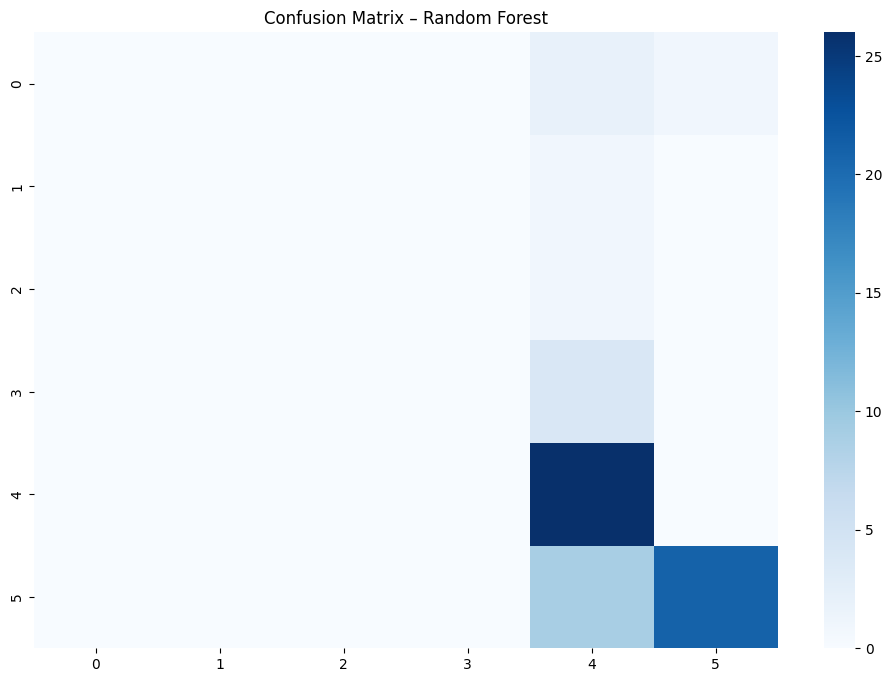

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

rf = models["Random Forest"]
cm = confusion_matrix(y_test, rf.predict(X_test))

plt.figure(figsize=(12, 8))
sns.heatmap(cm, cmap="Blues")
plt.title("Confusion Matrix – Random Forest")
plt.show()
